Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |


<h2 style="text-align: center">344.063: Special Topics - Natural Language Processing with Deep Learning (SS2022)</h2>
<h1 style="text-align: center; color:rgb(0,120,170)">Assignment 2: Document Classification with Attention and Transformers</h1>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-classification-attention"><li style="font-size:large;font-weight:bold">Task A: Document Classification with Attention (10 points)</li></a>
    <a href="#section-classification-transformer"><li style="font-size:large;font-weight:bold">Task B: Document Classification with Transformer (10 points)</li></a>
    <a href="#section-classification-bert"><li style="font-size:large;font-weight:bold">Task C: Document Classification with BERT (5 points)</li></a>
    <a href="#section-interpretation"><li style="font-size:large;font-weight:bold">Task D: Interpreting Attention Weights (3 extra points)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of this assignment is to implement a document (sequence) classification model with PyTorch using Attention networks, Transformers, and BERT. You can/should use the codes implemented in the previous assignment. Main aspects of the deep learning models in this assignment such as preprocessing, dictionary, word embeddings, data batching, loss functions, early stopping, and evaluation are explained in the previous assignment, and **are expected to be fully correct and functional in this assignment**.

The assignment has **25 points** in total as well as **3 overall extra points**. This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contains code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7) and `PyTorch` (>1.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `transformer`, `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, two datasets are provided. The datasets are taken from the data of `thedeep` project, produced by the DEEP (https://www.thedeep.io) platform. The DEEP is an open-source platform, which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset has 12 classes (labels) like agriculture, health, and protection. 

The difference between the datasets is in their sizes. We refer to these as `medium` and `small`, containing an overall number of 38,000 and 12,000 annotated text excerpts, respectively. Select one of the datasets, and use it for all of the tasks. `medium` provides more data and therefore reflects a more realistic scenario. `small` is however provided for the sake of convenience, particularly if running the experiments on your available hardware takes too long. Using `medium` is generally recommended, but from the point of view of assignment grading, there is no difference between the datasets.

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f07f0df27c017f8ea132693d61/38160/1583790728782872458/nlpwdl2022_data.zip).

Whether `medium` or `small`, you will find the following files in the provided zip file:
- `thedeep.$name$.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.label.txt`: Captions of the labels.
- `README.txt`: Terms of use of the dataset.

</div>



<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<div style="background-color:rgb(224, 243, 255)">

### Publishing Experiments Results

It is encouraged that you log and store any information about the training and evaluation of the models in an ML dashboard like [`TensorBoard`](https://www.tensorflow.org/tensorboard) or [`wandb`](https://wandb.ai/site). This can contain any important aspect of training such as the changes in the evaluation results on validation, training loss, or learning rate. 

To this end, in the case of `TensorBoard`, after finalizing all experiments and cleaning any unnecessary experiment, publish the log files results through [`TensorBoard.dev`](https://tensorboard.dev). A simple way of doing it is by running the following command in the folder of log files:

`tensorboard dev upload --name my_exp --logdir path/to/output_dir`

`TensorBoard.dev` uploads the necessary files and provides a URL to see the TensorBoard's console. Insert the URL in the cell below.

</div>

**URL :** *EDIT!*

<a name="section-classification-attention"></a><h2 style="color:rgb(0,120,170)">Task A: Document Classification with Attention (10 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using Attention networks. The model is called **`ClassificationAttentionModel`** in the code, containing all various variants as explained later. The basic architecture of `ClassificationAttentionModel` is shown in the figure below.

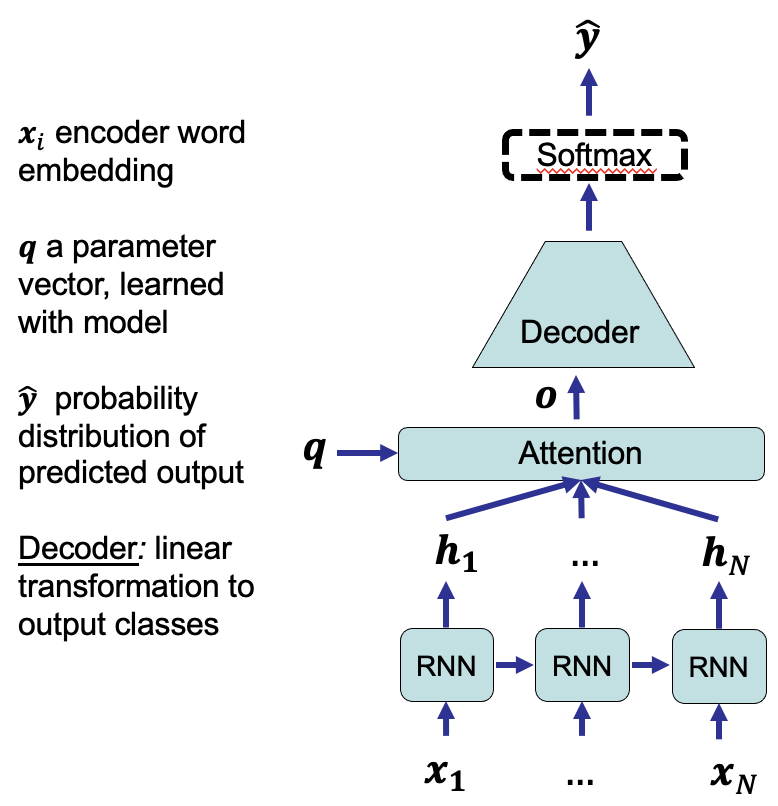

The implementation of the basic architecture of `ClassificationAttentionModel` should cover the following points:

**Baseline model**  

- **Embeddings & RNN Layer (1 points).** The baseline model first fetches the corresponding embeddings of the word IDs of a given batch. Next, a bidirectional LSTM/GRU layer is applied to the word embeddings. The hidden states of this RNN model can be seen as the contextual embeddings of the underlying word embeddings, and will be used in the next layer instead of the original word embeddings.

- **Attention Layer (4 points).** To create the Attention layer, implement an attention network that satisfies the needs of the assignment, i.e. masking as explained in the following. While it is suggested that you implement this attention network by yourself from scratch, you are allowed to use any available implementation of (single-head) attention networks. Among various implementations, the only ones that you are **NOT allowed** to use in this task are the ones based on multi-heads like `torch.nn.MultiheadAttention`. In the baseline architecture, the Attention network must be the (single-head) basic dot-product. Query vector is defined in the model initialization as *a vector of learnable parameters*, whose values will be learned together with the other model's parameters during training. The hidden states of the previous layer are passed as the values (and keys) to the Attention layer, where the Query vector is the query of the Attention. An important point in the forward pass of the Attention layer is setting correct padding masks. These should mask out the attention weights of the padded tokens of each batch. The masks excludes the corresponding vectors of these padded tokens from the calculations in Attention. If the mask is not passed correctly, the padded items will be counted in the Softmax of the Attention layer, and influence other attention weights. A sign that it is working correctly is that final attention weights of the corresponding vectors of the padded tokens are equal to zero. 

- **Prediction Layer (1 points).** The output of the Attention layer for each batch is the corresponding document embedding, passed to the decoder layer (a linear projection) and softmax to predict the probability distribution of the output classes.

- **General model functionality (1 points).** 


**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationAttentionModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **No RNN (1 point).** Run the model without the RNN layer.

- **Attention Type (1 point).** Implement another type of single-head Attention other than basic dot-product.

**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.


</div>

<a name="section-classification-transformer"></a><h2 style="color:rgb(0,120,170)">Task B: Document Classification with Transformer (10 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using Transformer Decoder. This model is called **`ClassificationTransformerModel`** in the code, containing all various variants as explained later. 

The implementation of the basic architecture of `ClassificationTransformerModel` covers the following points:

**Baseline model:** The architecture of baseline `ClassificationTransformerModel`is the exactly the same as the one of `ClassificationAttentionModel`. The only difference is that `ClassificationTransformerModel` replaces the Attention layer with a Transformer Decoder. 

- **Transformer Decoder (3 points).** Use `torch.nn.TransformerDecoder` class or any other implementation of Transformer Decoder. The baseline model consists of one layer of Transformer Decoder and is defined with default parameters of Transformer Decoder. As before, Query vector is defined separately, and used as the query of the Transformer.

- **Model Functionality (1 point).**

**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationTransformerModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Transformer Encoder (3 point).** Replace the RNN layer with a Transformer Encoder. Similar to the RNN, the aim of this layer is to provide contextual embeddings of the input word embeddings. 

- **Number of heads (1 point).** Study the effect of increasing/decreasing the number of heads of the Transformer Decoder.

- **Number of layers (1 point).** Study the effect of increasing the layers of the Transformer Decoder.


**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.
</div>

<a name="section-classification-bert"></a><h2 style="color:rgb(0,120,170)">Task C: Document Classification with BERT (5 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using BERT. This model is called **`ClassificationBERTModel`**.

**Model Functionality (4 points):** Use the `transformers` library from `huggingface` to load a (small) pre-trained BERT model for document classification. Select a BERT model according to your available resources. The available models can be found [here](https://huggingface.co/models) and [here](https://github.com/google-research/bert). The weights of the BERT model should be fine-tuned using the available training data of the task. Consult the documentation of `huggingface` for a correct implementation of the classifier. 

**Reporting and discussion (1 point).** Evaluate the model and report the results.

</div>

<a name="section-interpretation"></a><h2 style="color:rgb(0,120,170)">Task D: Interpreting Attention Weights (3 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">

The aim of this task is to provide an interpretation of the functionality of one of the models, by exploring which words have the higher contributions to the prediction results of some specific documents. 

**Attention weights (2.5 extra points):** Select one of the models trained in the previous tasks as you prefer. Select four documents from test set, such that two are correctly and the other two are incorrectly classified by the model. Next, run the forward pass for each of these documents and extract the corresponding attention weights from the model. Separately for each document, interpret the mechanism of the classifier by looking at the words with the highest attention weights. Do these words – in your opinion – provide important information to the predicted class?

**Visualization (0.5 overall extra points):** Visualize the attention weights over document’s words. Some suggested tools and resources:

https://github.com/minqi/hnatt

https://github.com/jiesutd/Text-Attention-Heatmap-Visualization 

https://github.com/cbaziotis/neat-vision
</div>